In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import re

In [3]:
# ler datasets e salvar em dataframes

def read_txt_files(diretorios):
    dfs = []
    for diretorio in diretorios:
        data = []
        for folder in os.listdir(diretorio):
            folder_path = os.path.join(diretorio, folder)
            if os.path.isdir(folder_path):
                for file in os.listdir(folder_path):
                    file_path = os.path.join(folder_path, file)
                    if file.endswith('.txt'):
                        with open(file_path, 'r', encoding='utf-8') as f:
                            content = f.read()
                            data.append({'Pasta': folder, 'Arquivo': file, 'Conteúdo': content})
        df = pd.DataFrame(data)
        dfs.append(df)
    return dfs

diretorios = []

dfs = read_txt_files(diretorios)

df_cidade = dfs[0]
df_city = dfs[1]
df_doenca = dfs[2]
df_disease = dfs[3]

In [4]:
def remover_caracteres_especiais(texto):
    manter = r'[^a-zA-Z0-9\s]'

    return re.sub(manter, '', texto)

for df in dfs:
    for coluna in df.columns:
        df['Conteúdo'] = df['Conteúdo'].apply(remover_caracteres_especiais)

In [5]:
# aplicar o tokenizador nos datasets

def tokenizar_df(df):
    df['palavras'] = df['Conteúdo'].apply(word_tokenize)
    return df

df_tokenizados = [tokenizar_df(df) for df in dfs]

In [6]:
# fazer a contagem de palavras

def palavras_contagem(palavras_lista):
    return len(palavras_lista)

def contar_palavras(df):
    df['palavras qtd'] = df['palavras'].apply(palavras_contagem)
    return df

dfs_contagem = [contar_palavras(df) for df in df_tokenizados]

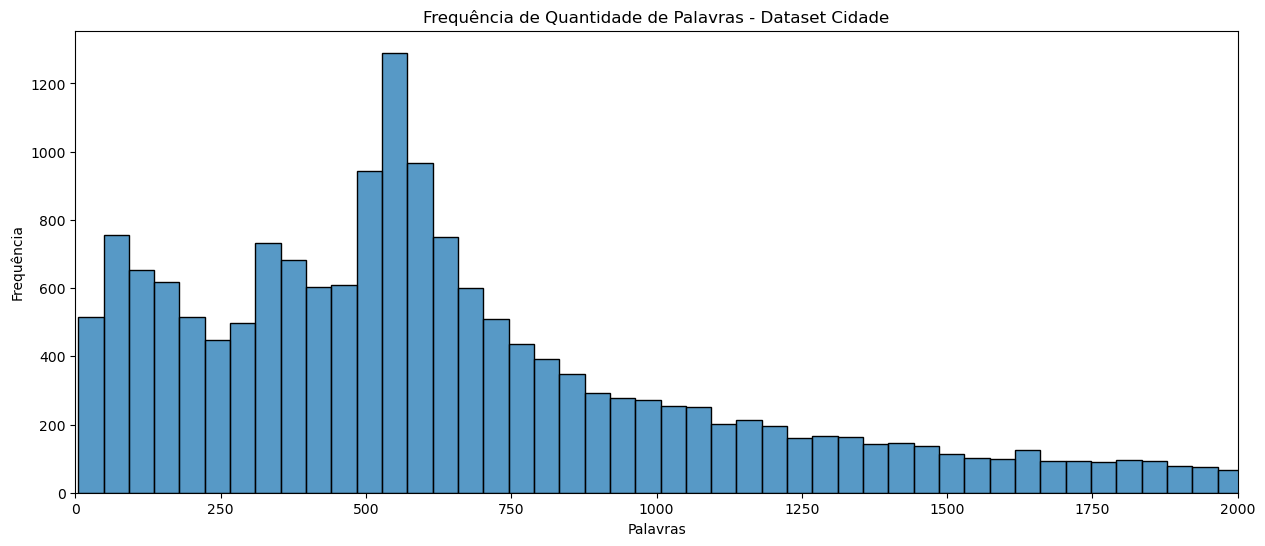

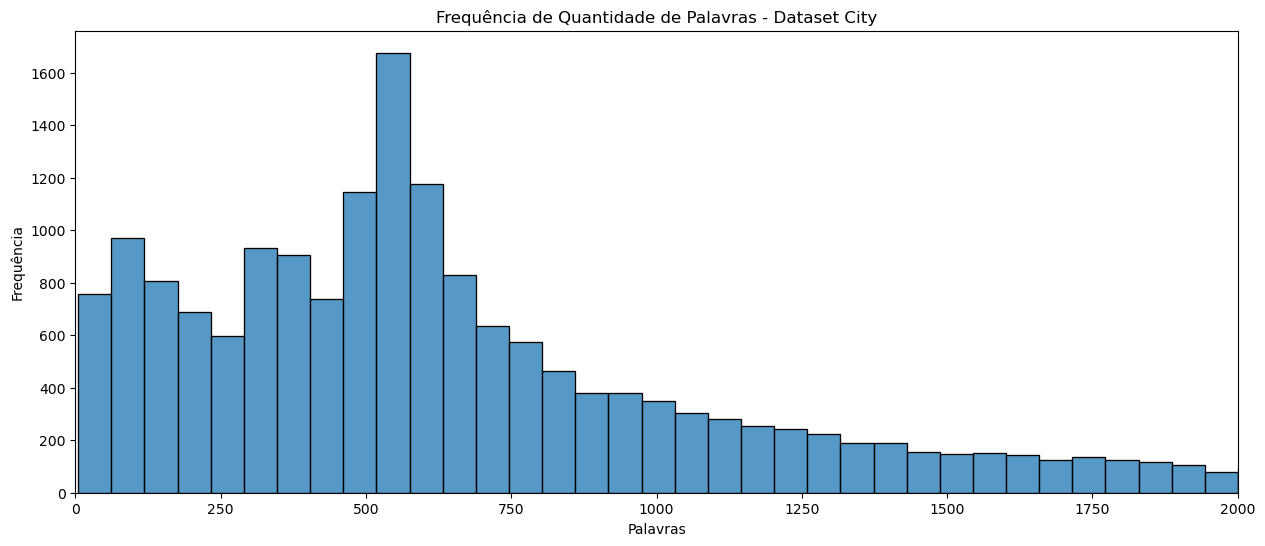

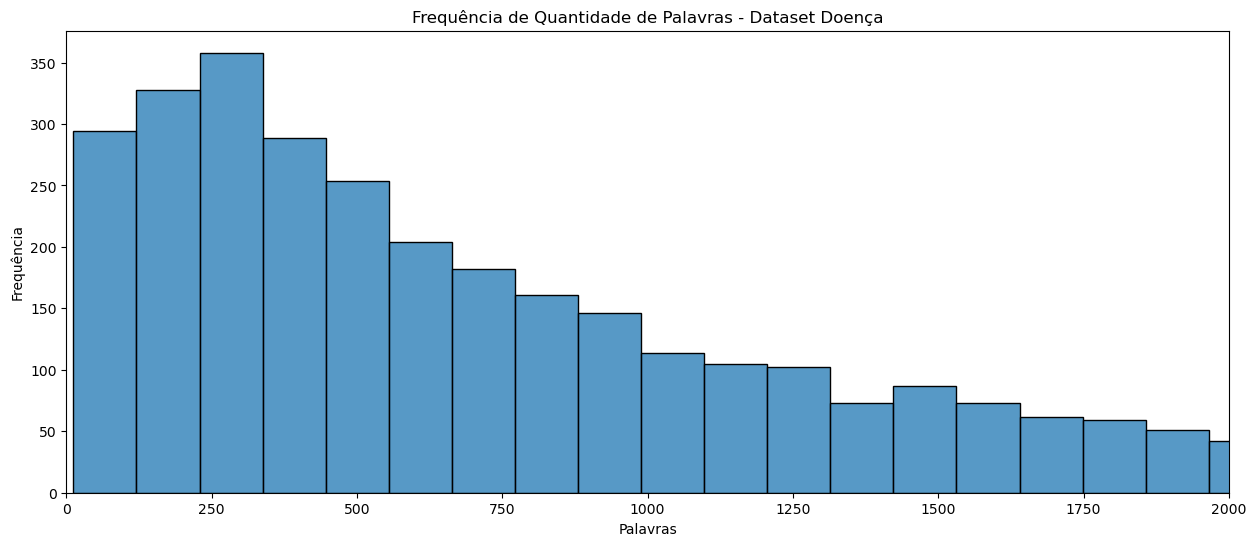

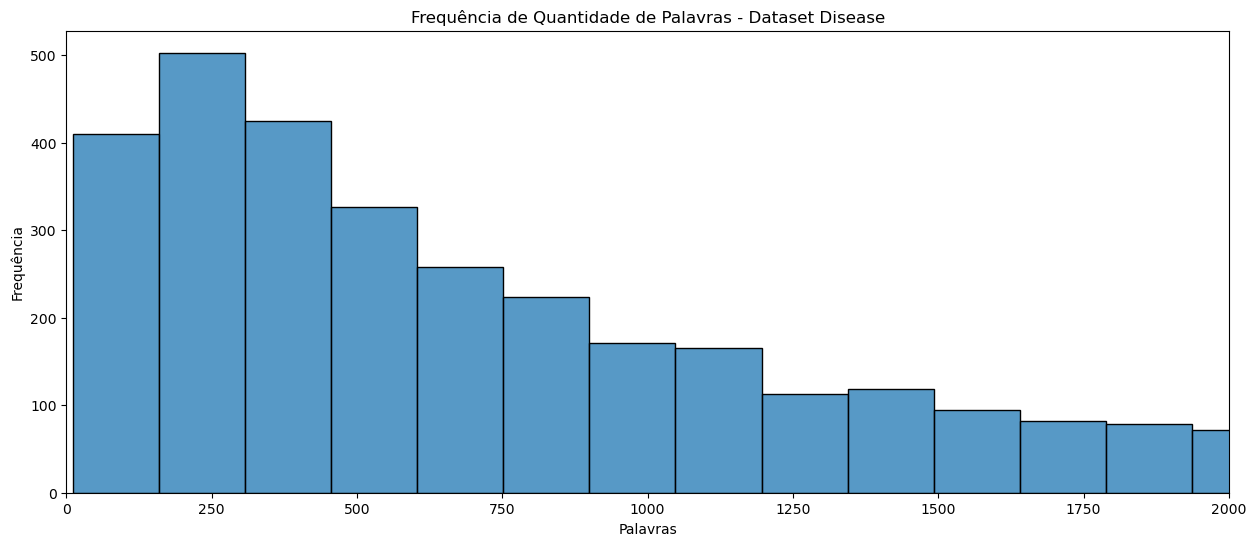

In [22]:
# gráficos dos valores

datasets = ["Dataset Cidade", "Dataset City", "Dataset Doença", "Dataset Disease"]

for df, datasets in zip(dfs_contagem, datasets):

    plt.figure(figsize=(15, 6))
    sns.histplot(df['palavras qtd'], kde=False)
    plt.title(f'Frequência de Quantidade de Palavras - {datasets}')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.xlim(0, 2000)
    plt.show()